In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as dset
from torchvision import datasets, transforms

In [2]:
# Transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3801,))
])

In [3]:
# Data
root_path = 'd:\\Gitwork\\'
trainSet = datasets.MNIST(root=root_path, download=True, train=True,  transform=transform)
testSet  = datasets.MNIST(root=root_path, download=True, train=False, transform=transform)

BatchSize = 100

trainLoader = dset.DataLoader(trainSet, batch_size=BatchSize, shuffle=True)
testLoader = dset.DataLoader(testSet, batch_size=BatchSize, shuffle=False)

In [4]:
print(trainSet.train_data.size())
print(trainSet.train_labels.size())

print(type(trainSet.train_data[0]))
print(type(trainSet.train_labels[0]))

print(trainSet.train_data[0])
print(trainSet.train_labels[0])

torch.Size([60000, 28, 28])
torch.Size([60000])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175

C:\opt\miniconda3\envs\py37\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\opt\miniconda3\envs\py37\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


C:\opt\miniconda3\envs\py37\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\opt\miniconda3\envs\py37\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


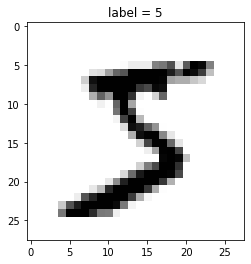

In [5]:
import matplotlib.pyplot as plt

plt.imshow(trainSet.train_data[0].numpy(), cmap='binary')
plt.title('label = %i' % trainSet.train_labels[0])
plt.show()

In [6]:
# GPU
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU State:', device)

GPU State: cuda:0


In [7]:
# Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(in_features=784, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, input):
        return self.main(input)


net = Net().to(device)
print(net)

Net(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): LogSoftmax()
  )
)


In [8]:
# Parameters
epochs = 3
lr = 0.002
criterion = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.002, momentum=0.9)

In [9]:
# Train
for epoch in range(epochs):
    running_loss = 0.0

    for i, data in enumerate(trainLoader):
        inputs, labels = data[0].to(device), data[1].to(device)
        inputs = inputs.view(inputs.shape[0], -1)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Foward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if (i+1) % BatchSize == 0 or i+1 == len(trainLoader):
            print('[%d/%d, %d/%d] loss: %.3f' % (epoch+1, epochs, i+1, len(trainLoader), running_loss/2000))

print('Training Finished.')

[1/3, 100/600] loss: 0.106
[1/3, 200/600] loss: 0.171
[1/3, 300/600] loss: 0.204
[1/3, 400/600] loss: 0.228
[1/3, 500/600] loss: 0.249
[1/3, 600/600] loss: 0.268
[2/3, 100/600] loss: 0.017
[2/3, 200/600] loss: 0.034
[2/3, 300/600] loss: 0.051
[2/3, 400/600] loss: 0.066
[2/3, 500/600] loss: 0.081
[2/3, 600/600] loss: 0.095
[3/3, 100/600] loss: 0.014
[3/3, 200/600] loss: 0.027
[3/3, 300/600] loss: 0.040
[3/3, 400/600] loss: 0.052
[3/3, 500/600] loss: 0.065
[3/3, 600/600] loss: 0.077
Training Finished.


In [10]:
# Test
correct = 0
total = 0

with torch.no_grad():
    for data in testLoader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        inputs = inputs.view(inputs.shape[0], -1)

        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100*correct / total))

class_correct = [0 for i in range(10)]
class_total = [0 for i in range(10)]

with torch.no_grad():
    for data in testLoader:
        inputs, labels = data[0].to(device), data[1].to(device)
        inputs = inputs.view(inputs.shape[0], -1)

        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            print(class_correct)
            print(class_total)

for i in range(10):
    print('Accuracy of %d: %3f' % (i, (class_correct[i]/class_total[i])))

Accuracy of the network on the 10000 test images: 93 %
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 2, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 2, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 0]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 0]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 1]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 1]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 1]
[1, 2, 1, 0, 2, 1, 0, 1, 0, 1]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 2]
[1, 2, 1, 0, 2, 1, 0, 1, 0, 2]
[1, 2, 1, 0, 2, 0, 1, 1, 0, 2]
[1, 2, 1, 0, 2, 1, 1, 1, 0, 2]
[2, 2, 1, 0, 2, 0, 1, 1, 0, 2]
[2, 2, 1, 0, 2, 1, 1, 1, 0, 2]
[2, 2, 1, 0, 2, 1, 1, 1, 0, 2]
[2, 2, 1, 0, 2, 2, 1, 1, 0, 2]
[2, 2, 1, 0, 3, 1, 1, 1, 0, 2]
[2, 2, 1, 0, 3, 2, 1, 1, 0, 2]
[2, 2, 1, 0, 3, 1, 1, 1, 0, 3]
[2, 2, 1, 0, 3, 2, 1, 1, 0, 3]
[2, 2, 1, 0, 3,

[12, 19, 13, 13, 16, 6, 12, 12, 11, 17]
[12, 19, 13, 15, 18, 9, 12, 13, 13, 18]
[12, 19, 14, 13, 16, 6, 12, 12, 11, 17]
[12, 19, 14, 15, 18, 9, 12, 13, 13, 18]
[12, 20, 14, 13, 16, 6, 12, 12, 11, 17]
[12, 20, 14, 15, 18, 9, 12, 13, 13, 18]
[13, 20, 14, 13, 16, 6, 12, 12, 11, 17]
[13, 20, 14, 15, 18, 9, 12, 13, 13, 18]
[13, 20, 14, 13, 16, 7, 12, 12, 11, 17]
[13, 20, 14, 15, 18, 10, 12, 13, 13, 18]
[13, 20, 14, 13, 16, 8, 12, 12, 11, 17]
[13, 20, 14, 15, 18, 11, 12, 13, 13, 18]
[13, 20, 15, 13, 16, 8, 12, 12, 11, 17]
[13, 20, 15, 15, 18, 11, 12, 13, 13, 18]
[14, 20, 15, 13, 16, 8, 12, 12, 11, 17]
[14, 20, 15, 15, 18, 11, 12, 13, 13, 18]
[14, 20, 16, 13, 16, 8, 12, 12, 11, 17]
[14, 20, 16, 15, 18, 11, 12, 13, 13, 18]
[14, 20, 16, 13, 16, 8, 12, 12, 11, 17]
[14, 20, 16, 15, 18, 11, 12, 14, 13, 18]
[14, 20, 16, 13, 16, 8, 12, 12, 11, 18]
[14, 20, 16, 15, 18, 11, 12, 14, 13, 19]
[14, 20, 16, 13, 16, 8, 12, 12, 12, 18]
[14, 20, 16, 15, 18, 11, 12, 14, 14, 19]
[14, 20, 16, 14, 16, 8, 12, 12, 

[28, 32, 26, 30, 38, 18, 23, 29, 23, 24]
[28, 32, 27, 35, 40, 21, 24, 32, 25, 28]
[28, 33, 26, 30, 38, 18, 23, 29, 23, 24]
[28, 33, 27, 35, 40, 21, 24, 32, 25, 28]
[28, 33, 26, 30, 38, 19, 23, 29, 23, 24]
[28, 33, 27, 35, 40, 22, 24, 32, 25, 28]
[28, 33, 27, 30, 38, 19, 23, 29, 23, 24]
[28, 33, 28, 35, 40, 22, 24, 32, 25, 28]
[28, 33, 27, 30, 38, 19, 23, 29, 24, 24]
[28, 33, 28, 35, 40, 22, 24, 32, 26, 28]
[28, 33, 27, 30, 38, 19, 23, 29, 24, 24]
[28, 33, 28, 36, 40, 22, 24, 32, 26, 28]
[28, 33, 27, 30, 39, 19, 23, 29, 24, 24]
[28, 33, 28, 36, 41, 22, 24, 32, 26, 28]
[28, 33, 27, 30, 39, 19, 23, 29, 24, 25]
[28, 33, 28, 36, 41, 22, 24, 32, 26, 29]
[28, 33, 27, 30, 39, 20, 23, 29, 24, 25]
[28, 33, 28, 36, 41, 23, 24, 32, 26, 29]
[28, 33, 27, 30, 39, 20, 24, 29, 24, 25]
[28, 33, 28, 36, 41, 23, 25, 32, 26, 29]
[28, 33, 27, 30, 39, 20, 24, 29, 24, 26]
[28, 33, 28, 36, 41, 23, 25, 32, 26, 30]
[28, 33, 27, 30, 39, 20, 24, 29, 25, 26]
[28, 33, 28, 36, 41, 23, 25, 32, 27, 30]
[28, 34, 27, 30,

[38, 44, 43, 40, 44, 29, 38, 46, 37, 37]
[38, 46, 45, 46, 46, 35, 41, 51, 40, 44]
[38, 44, 43, 40, 44, 29, 38, 46, 37, 37]
[38, 46, 45, 46, 46, 36, 41, 51, 40, 44]
[38, 45, 43, 40, 44, 29, 38, 46, 37, 37]
[38, 47, 45, 46, 46, 36, 41, 51, 40, 44]
[38, 46, 43, 40, 44, 29, 38, 46, 37, 37]
[38, 48, 45, 46, 46, 36, 41, 51, 40, 44]
[38, 46, 43, 40, 44, 29, 38, 46, 38, 37]
[38, 48, 45, 46, 46, 36, 41, 51, 41, 44]
[38, 46, 43, 40, 44, 29, 38, 46, 38, 37]
[38, 48, 45, 47, 46, 36, 41, 51, 41, 44]
[38, 46, 43, 40, 44, 30, 38, 46, 38, 37]
[38, 48, 45, 47, 46, 37, 41, 51, 41, 44]
[38, 47, 43, 40, 44, 30, 38, 46, 38, 37]
[38, 49, 45, 47, 46, 37, 41, 51, 41, 44]
[38, 47, 43, 40, 44, 30, 38, 46, 38, 38]
[38, 49, 45, 47, 46, 37, 41, 51, 41, 45]
[38, 47, 43, 40, 44, 30, 38, 47, 38, 38]
[38, 49, 45, 47, 46, 37, 41, 52, 41, 45]
[38, 47, 44, 40, 44, 30, 38, 47, 38, 38]
[38, 49, 46, 47, 46, 37, 41, 52, 41, 45]
[38, 47, 45, 40, 44, 30, 38, 47, 38, 38]
[38, 49, 47, 47, 46, 37, 41, 52, 41, 45]
[39, 47, 45, 40,

[52, 62, 59, 56, 57, 38, 48, 52, 49, 51]
[52, 64, 61, 64, 59, 45, 51, 58, 55, 63]
[52, 62, 59, 56, 57, 38, 49, 52, 49, 51]
[52, 64, 61, 64, 59, 45, 52, 58, 55, 63]
[52, 62, 59, 57, 57, 38, 49, 52, 49, 51]
[52, 64, 61, 65, 59, 45, 52, 58, 55, 63]
[52, 62, 59, 57, 57, 38, 49, 52, 49, 52]
[52, 64, 61, 65, 59, 45, 52, 58, 55, 64]
[52, 62, 59, 57, 57, 38, 49, 52, 49, 53]
[52, 64, 61, 65, 59, 45, 52, 58, 55, 65]
[52, 62, 59, 57, 57, 39, 49, 52, 49, 53]
[52, 64, 61, 65, 59, 46, 52, 58, 55, 65]
[52, 62, 59, 57, 57, 39, 49, 52, 49, 54]
[52, 64, 61, 65, 59, 46, 52, 58, 55, 66]
[52, 62, 59, 58, 57, 39, 49, 52, 49, 54]
[52, 64, 61, 66, 59, 46, 52, 58, 55, 66]
[52, 62, 59, 58, 57, 39, 49, 53, 49, 54]
[52, 64, 61, 66, 59, 46, 52, 59, 55, 66]
[52, 62, 59, 58, 57, 39, 49, 53, 49, 55]
[52, 64, 61, 66, 59, 46, 52, 59, 55, 67]
[52, 62, 59, 58, 57, 39, 50, 53, 49, 55]
[52, 64, 61, 66, 59, 46, 53, 59, 55, 67]
[52, 62, 59, 58, 57, 40, 50, 53, 49, 55]
[52, 64, 61, 66, 59, 47, 53, 59, 55, 67]
[52, 62, 59, 58,

[61, 82, 70, 73, 70, 50, 64, 69, 64, 72]
[62, 84, 75, 81, 72, 58, 68, 75, 71, 85]
[61, 82, 70, 73, 71, 50, 64, 69, 64, 72]
[62, 84, 75, 81, 73, 58, 68, 75, 71, 85]
[61, 82, 70, 73, 71, 50, 64, 69, 65, 72]
[62, 84, 75, 81, 73, 58, 68, 75, 72, 85]
[61, 83, 70, 73, 71, 50, 64, 69, 65, 72]
[62, 85, 75, 81, 73, 58, 68, 75, 72, 85]
[61, 83, 70, 73, 71, 51, 64, 69, 65, 72]
[62, 85, 75, 81, 73, 59, 68, 75, 72, 85]
[61, 83, 70, 73, 71, 51, 65, 69, 65, 72]
[62, 85, 75, 81, 73, 59, 69, 75, 72, 85]
[61, 83, 70, 73, 71, 52, 65, 69, 65, 72]
[62, 85, 75, 81, 73, 60, 69, 75, 72, 85]
[61, 83, 70, 73, 71, 52, 65, 70, 65, 72]
[62, 85, 75, 81, 73, 60, 69, 76, 72, 85]
[61, 83, 71, 73, 71, 52, 65, 70, 65, 72]
[62, 85, 76, 81, 73, 60, 69, 76, 72, 85]
[61, 83, 71, 73, 71, 52, 65, 70, 66, 72]
[62, 85, 76, 81, 73, 60, 69, 76, 73, 85]
[61, 83, 72, 73, 71, 52, 65, 70, 66, 72]
[62, 85, 77, 81, 73, 60, 69, 76, 73, 85]
[61, 83, 72, 74, 71, 52, 65, 70, 66, 72]
[62, 85, 77, 82, 73, 60, 69, 76, 73, 85]
[61, 83, 72, 74,

[71, 96, 81, 82, 82, 56, 75, 88, 78, 82]
[72, 99, 86, 92, 84, 64, 79, 94, 86, 95]
[72, 96, 81, 82, 82, 56, 75, 88, 78, 82]
[73, 99, 86, 92, 84, 64, 79, 94, 86, 95]
[72, 96, 81, 82, 82, 57, 75, 88, 78, 82]
[73, 99, 86, 92, 84, 65, 79, 94, 86, 95]
[72, 96, 81, 82, 82, 57, 75, 88, 78, 83]
[73, 99, 86, 92, 84, 65, 79, 94, 86, 96]
[72, 96, 81, 82, 82, 57, 75, 88, 78, 84]
[73, 99, 86, 92, 84, 65, 79, 94, 86, 97]
[72, 96, 81, 82, 82, 57, 75, 88, 79, 84]
[73, 99, 86, 92, 84, 65, 79, 94, 87, 97]
[72, 96, 81, 82, 82, 57, 75, 88, 79, 85]
[73, 99, 86, 92, 84, 65, 79, 94, 87, 98]
[72, 96, 81, 82, 82, 58, 75, 88, 79, 85]
[73, 99, 86, 92, 84, 66, 79, 94, 87, 98]
[72, 96, 81, 83, 82, 58, 75, 88, 79, 85]
[73, 99, 86, 93, 84, 66, 79, 94, 87, 98]
[72, 97, 81, 83, 82, 58, 75, 88, 79, 85]
[73, 100, 86, 93, 84, 66, 79, 94, 87, 98]
[72, 98, 81, 83, 82, 58, 75, 88, 79, 85]
[73, 101, 86, 93, 84, 66, 79, 94, 87, 98]
[72, 98, 81, 83, 82, 59, 75, 88, 79, 85]
[73, 101, 86, 93, 84, 67, 79, 94, 87, 98]
[72, 98, 82, 

[82, 113, 98, 100, 95, 69, 84, 101, 89, 95]
[83, 116, 105, 111, 97, 77, 88, 108, 97, 110]
[83, 113, 98, 100, 95, 69, 84, 101, 89, 95]
[84, 116, 105, 111, 97, 77, 88, 108, 97, 110]
[83, 114, 98, 100, 95, 69, 84, 101, 89, 95]
[84, 117, 105, 111, 97, 77, 88, 108, 97, 110]
[83, 114, 99, 100, 95, 69, 84, 101, 89, 95]
[84, 117, 106, 111, 97, 77, 88, 108, 97, 110]
[83, 114, 99, 100, 95, 69, 84, 101, 89, 95]
[84, 117, 106, 112, 97, 77, 88, 108, 97, 110]
[83, 114, 99, 100, 96, 69, 84, 101, 89, 95]
[84, 117, 106, 112, 98, 77, 88, 108, 97, 110]
[83, 114, 99, 100, 96, 70, 84, 101, 89, 95]
[84, 117, 106, 112, 98, 78, 88, 108, 97, 110]
[83, 114, 99, 100, 96, 70, 85, 101, 89, 95]
[84, 117, 106, 112, 98, 78, 89, 108, 97, 110]
[83, 114, 99, 100, 96, 70, 85, 102, 89, 95]
[84, 117, 106, 112, 98, 78, 89, 109, 97, 110]
Accuracy of 0: 0.988095
Accuracy of 1: 0.974359
Accuracy of 2: 0.933962
Accuracy of 3: 0.892857
Accuracy of 4: 0.979592
Accuracy of 5: 0.897436
Accuracy of 6: 0.955056
Accuracy of 7: 0.93578